### 1. Business Understanding

In this section, we define the business problem and the questions we aim to answer using the dataset.

#### Business Questions:
1. **What is the most popular neighbourhood for renting a room?**
2. **What is the most expensive neighbourhood, and what are the alternatives?**
3. **What features make a listing top-rated?**

### 2. Data Understanding

Here, we explore the dataset to understand its structure, contents, and potential issues.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Gather Data

In this section, we load the dataset and perform an initial exploration to understand its structure and contents.

In [4]:
# Load the dataset
df = pd.read_csv(r'setembro2019.csv', low_memory=False)

# Display the first few rows of the dataset
df.head()

# Check basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34329 entries, 0 to 34328
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 27.8+ MB


### Assess Data

Here, we assess the quality of the data by identifying missing values, inconsistencies, and potential issues.

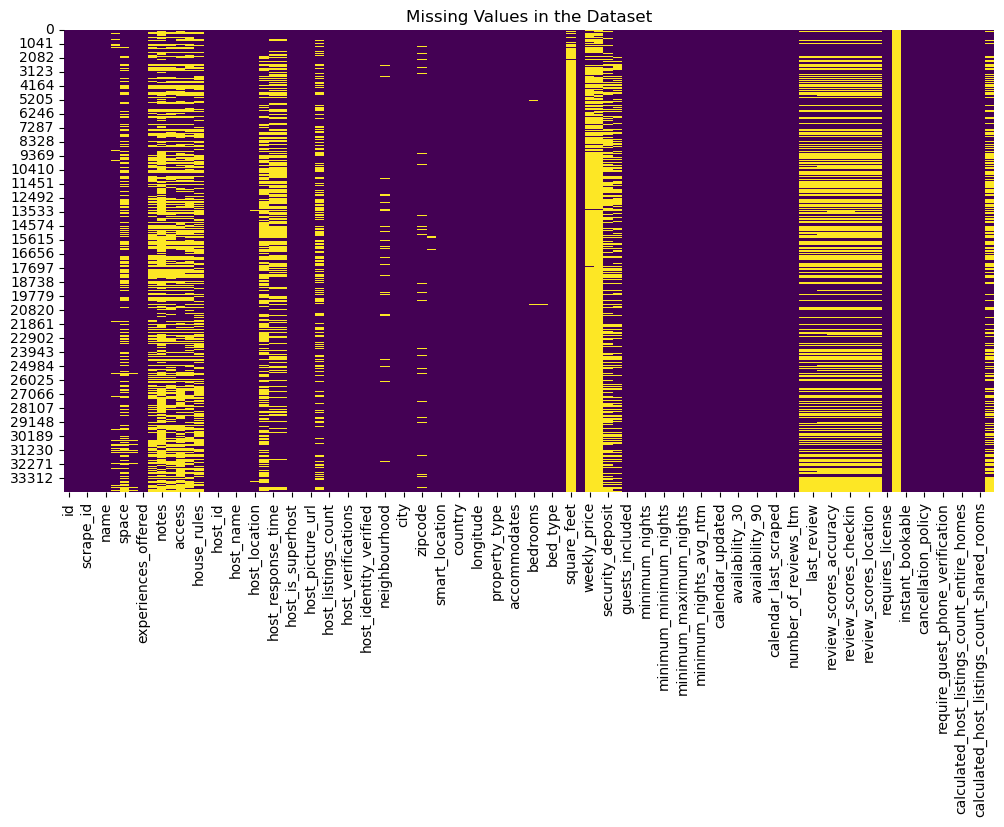

In [7]:
# Check for missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in the Dataset")
plt.show()

### 3. Data Preparation

In this step, we clean the dataset by handling missing values, transforming data types, and removing unnecessary columns.

#### Clean Data


In [9]:
# Function to clean currency columns
def clean_currency_column(column):
    """
    Clean a currency column by removing dollar signs and commas, and converting to float.

    Parameters:
    column (pd.Series): The column to clean.

    Returns:
    pd.Series: The cleaned column as float values.
    """
    return column.replace('[\$,]', '', regex=True).astype(float)

# Clean the price columns
price_columns = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']
for col in price_columns:
    df[col] = clean_currency_column(df[col])

# Fill missing values in price columns with the median
for col in price_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Verify the changes
print(df[price_columns].head())

   price  security_deposit  cleaning_fee  extra_people
0  329.0               0.0         374.0          62.0
1  158.0            1000.0         250.0          45.0
2  270.0               0.0          83.0          42.0
3  374.0            1040.0         171.0          62.0
4  129.0             400.0         140.0          80.0


### 5. Evaluation ( Analyze and Visualize Data)

In this section, we answer the business questions using statistical analysis and visualisations.

### Question 1: What is the most popular neighbourhood for renting a room?

In [12]:
# Group by neighbourhood and calculate the number of listings, average price, and average review score
neighbourhood_stats = df.groupby('neighbourhood_cleansed').agg(
    number_of_listings=('id', 'count'),
    average_price=('price', 'mean'),
    average_review_score=('review_scores_rating', 'mean')
).reset_index()

# Sort by number of listings to identify the most popular neighbourhood
neighbourhood_stats = neighbourhood_stats.sort_values(by='number_of_listings', ascending=False)

# Display the most popular neighbourhood
most_popular_neighbourhood = neighbourhood_stats.iloc[0]
print(f"Most Popular Neighbourhood: {most_popular_neighbourhood['neighbourhood_cleansed']}")
print(f"Number of Listings: {most_popular_neighbourhood['number_of_listings']}")
print(f"Average Price: R${most_popular_neighbourhood['average_price']:.2f}")
print(f"Average Review Score: {most_popular_neighbourhood['average_review_score']:.0f}/100")

Most Popular Neighbourhood: Copacabana
Number of Listings: 8530
Average Price: R$498.17
Average Review Score: 93/100


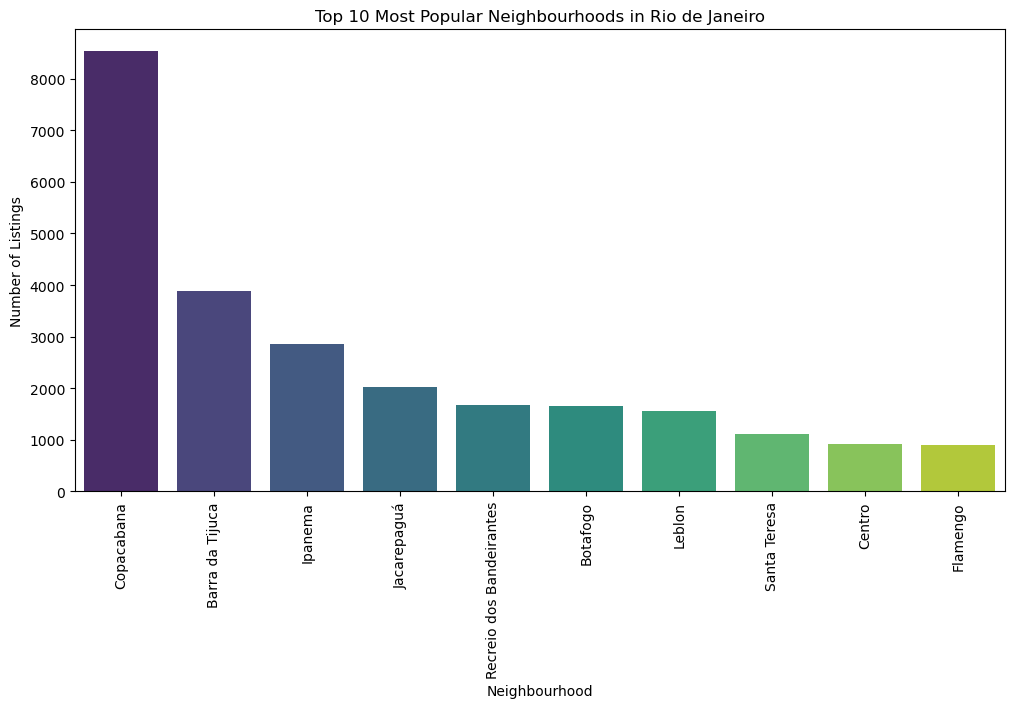

In [14]:
# Visualize the top 10 most popular neighbourhoods
top_10_neighbourhoods = neighbourhood_stats.head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_neighbourhoods, x='neighbourhood_cleansed', y='number_of_listings', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Top 10 Most Popular Neighbourhoods in Rio de Janeiro')
plt.show()

### Question 2: What is the most expensive neighbourhood, and what are the alternatives?

In this section, we identify the most expensive neighbourhoods and analyze their characteristics.

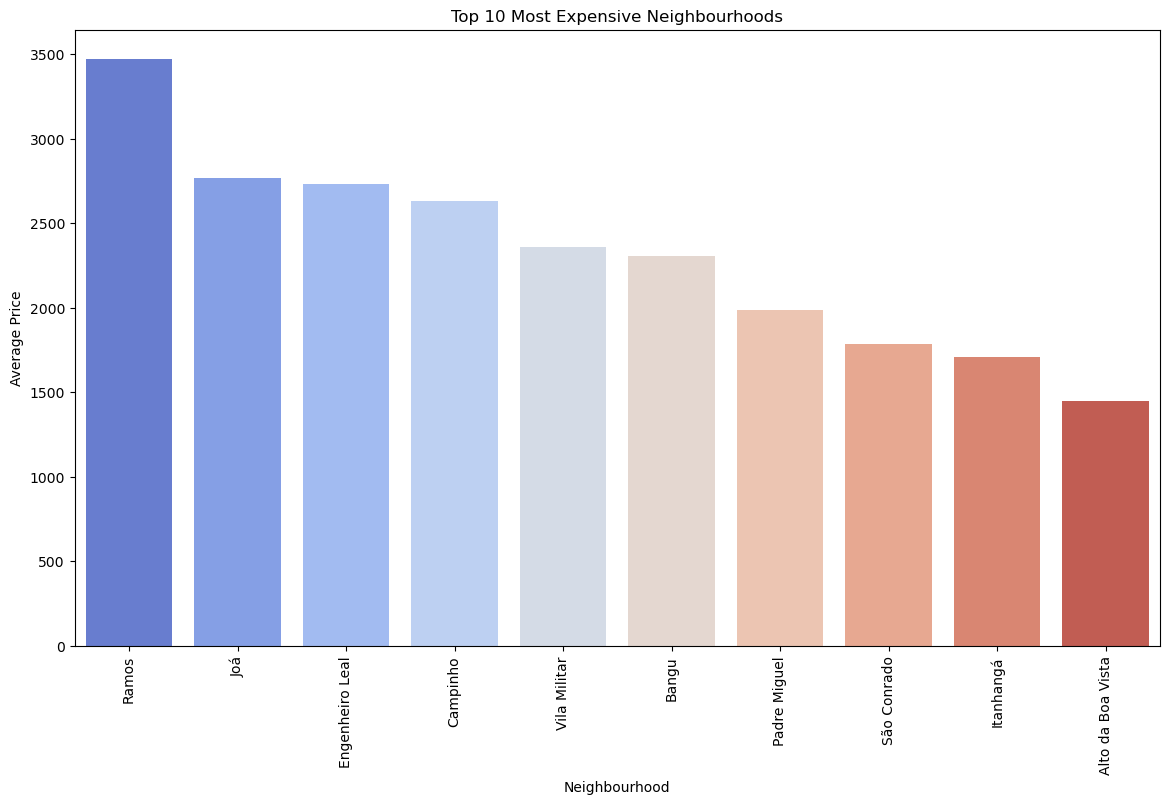

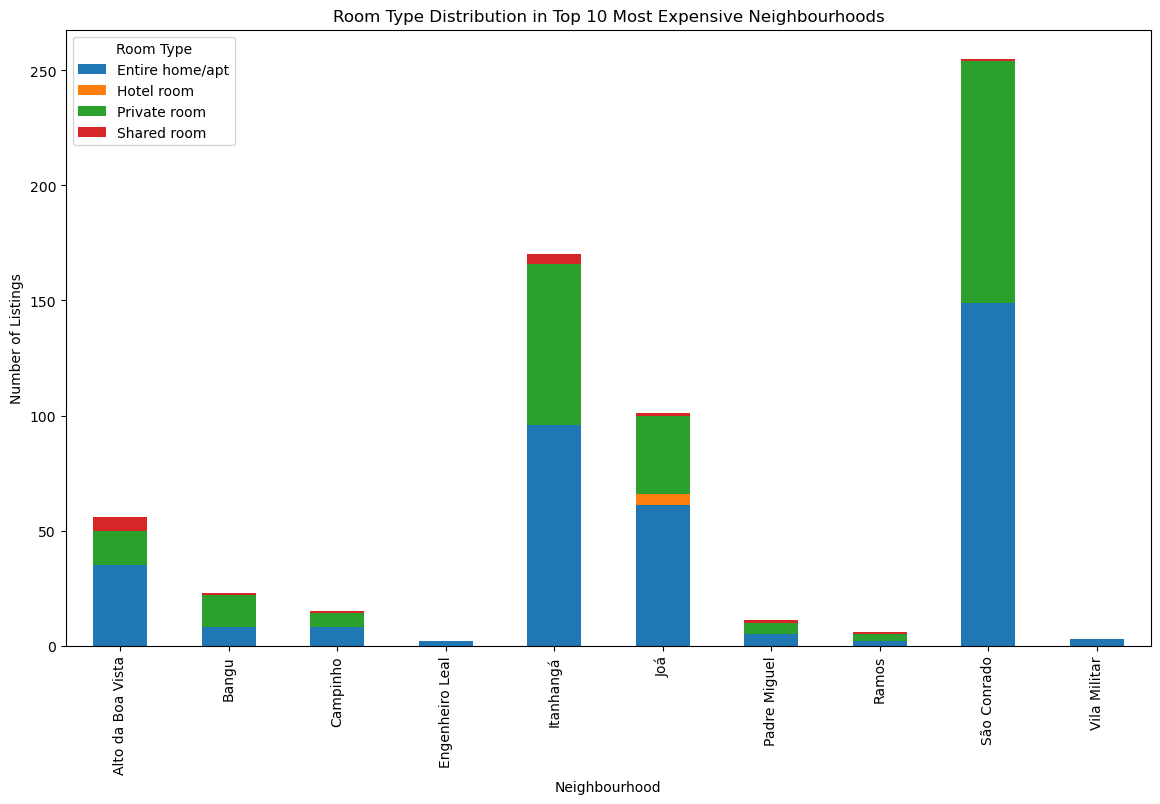

Most Expensive Neighbourhood: Ramos
Average Price: R$3472.33


In [15]:
# Sort by average price and select the Top 10 most expensive neighbourhoods
top_10_expensive_neighbourhoods = neighbourhood_stats.sort_values(by='average_price', ascending=False).head(10)

# Visualise the results
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_expensive_neighbourhoods, x='neighbourhood_cleansed', y='average_price', palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Top 10 Most Expensive Neighbourhoods')
plt.show()

# Analyse room types in these neighbourhoods
room_type_distribution = df[df['neighbourhood_cleansed'].isin(top_10_expensive_neighbourhoods['neighbourhood_cleansed'])].groupby(
    ['neighbourhood_cleansed', 'room_type']).size().unstack()

# Visualise room type distribution
room_type_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Room Type Distribution in Top 10 Most Expensive Neighbourhoods')
plt.xticks(rotation=90)
plt.legend(title='Room Type')
plt.show()

# Sort by average price and select the Top 10 most expensive neighbourhoods
top_10_expensive_neighbourhoods = neighbourhood_stats.sort_values(by='average_price', ascending=False).head(10)

# Display the most expensive neighbourhood
most_expensive_neighbourhood = top_10_expensive_neighbourhoods.iloc[0]
print(f"Most Expensive Neighbourhood: {most_expensive_neighbourhood['neighbourhood_cleansed']}")
print(f"Average Price: R${most_expensive_neighbourhood['average_price']:.2f}")

### Most Common Accommodation Price

Here, we analyze the distribution of accommodation prices to identify the most common price range.

Descriptive Statistics of Average Prices:
count     153.000000
mean      537.166355
std       547.980186
min        42.000000
25%       246.500000
50%       384.200000
75%       587.250000
max      3472.333333
Name: average_price, dtype: float64


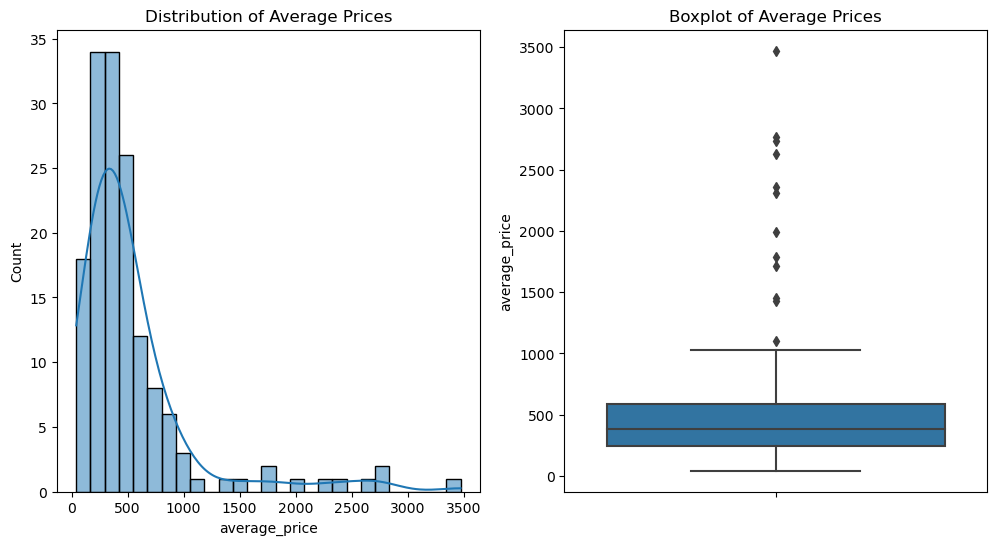

\nEstimated Common Value (based on median): R$384.20
Standard Deviation: R$547.98
Rango de valor común estimado: R$163.78 a R$932.18


In [19]:
# Descriptive Statistics
print("Descriptive Statistics of Average Prices:")
print(neighbourhood_stats['average_price'].describe())

# Visualising the Distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(neighbourhood_stats['average_price'], kde=True)
plt.title('Distribution of Average Prices')

plt.subplot(1, 2, 2)
sns.boxplot(y=neighbourhood_stats['average_price'])
plt.title('Boxplot of Average Prices')

plt.show()

# Identifying a "Common Value"
median_price = neighbourhood_stats['average_price'].median()
std_price = neighbourhood_stats['average_price'].std()

print(f"\\nEstimated Common Value (based on median): R${median_price:.2f}")
print(f"Standard Deviation: R${std_price:.2f}")

# Common value range, median +/- 1 standard deviation (using absolute values for lower bound)
lower_bound = abs(median_price - std_price)
upper_bound = median_price + std_price
print(f"Rango de valor común estimado: R${lower_bound:.2f} a R${upper_bound:.2f}")

### Question 3: What features make a listing top-rated?

In this section, we analyze the top-rated listings to identify common features that contribute to high review scores.

Common Features of Top 20 Listings:
              room_type host_is_superhost  \
count                20                20   
unique                3                 1   
top     Entire home/apt                 f   
freq                 13                20   

                                                amenities  
count                                                  20  
unique                                                 20  
top     {"Smoking allowed","Pets allowed","Suitable fo...  
freq                                                    1  


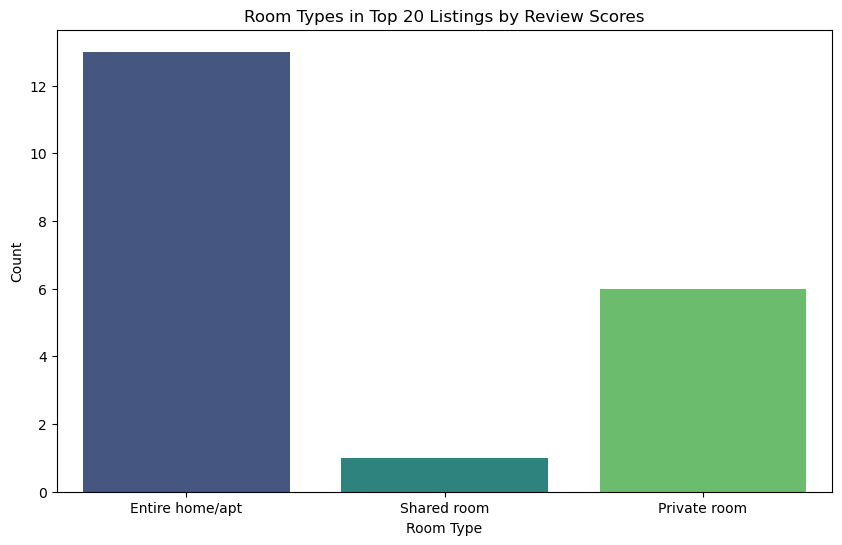

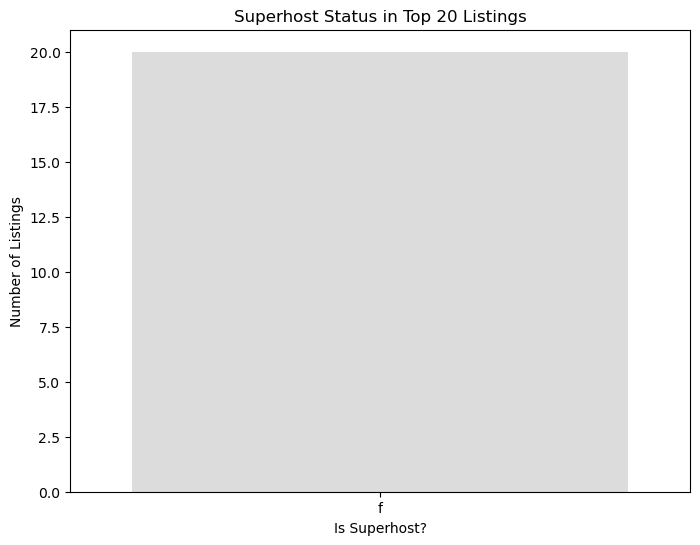

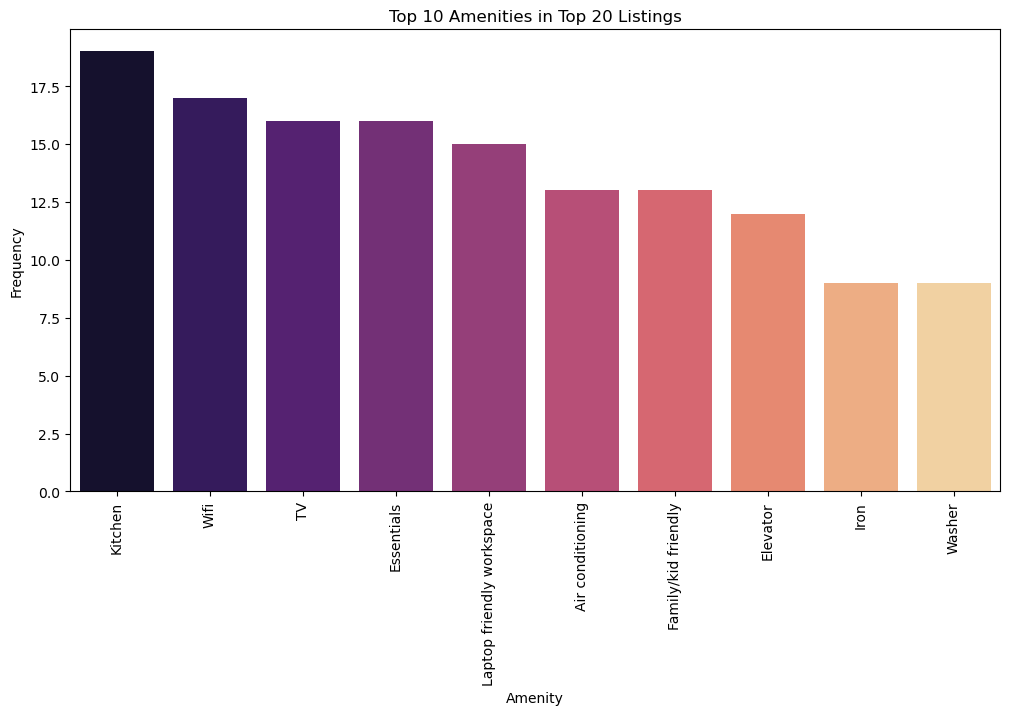

In [20]:
# Sort by review scores and select the Top 20 listings
top_20_listings = df.sort_values(by='review_scores_rating', ascending=False).head(20)

# Analyse common features (e.g., room type, superhost status, amenities)
common_features = top_20_listings[['room_type', 'host_is_superhost', 'amenities']]

# Display the common features
print("Common Features of Top 20 Listings:")
print(common_features.describe())

# Visualise room type distribution in Top 20 listings
plt.figure(figsize=(10, 6))
sns.countplot(data=top_20_listings, x='room_type', palette='viridis')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Types in Top 20 Listings by Review Scores')
plt.show()

# Analyse superhost status in Top 20 listings
superhost_counts = top_20_listings['host_is_superhost'].value_counts()

# Visualise superhost status
plt.figure(figsize=(8, 6))
sns.barplot(x=superhost_counts.index, y=superhost_counts.values, palette='coolwarm')
plt.xlabel('Is Superhost?')
plt.ylabel('Number of Listings')
plt.title('Superhost Status in Top 20 Listings')
plt.show()

# Analyse amenities in Top 20 listings
from collections import Counter

# Split amenities and count their frequency
amenities_list = top_20_listings['amenities'].apply(lambda x: x.strip('{}').replace('"', '').split(','))
amenities_counter = Counter([amenity for sublist in amenities_list for amenity in sublist])

# Get the top 10 most common amenities
top_10_amenities = amenities_counter.most_common(10)

# Visualise the top 10 amenities
plt.figure(figsize=(12, 6))
sns.barplot(x=[x[0] for x in top_10_amenities], y=[x[1] for x in top_10_amenities], palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Amenity')
plt.ylabel('Frequency')
plt.title('Top 10 Amenities in Top 20 Listings')
plt.show()

### Top 10 Most Popular Room Types

In this section, we identify the top room types with the most listings and analyze their performance.

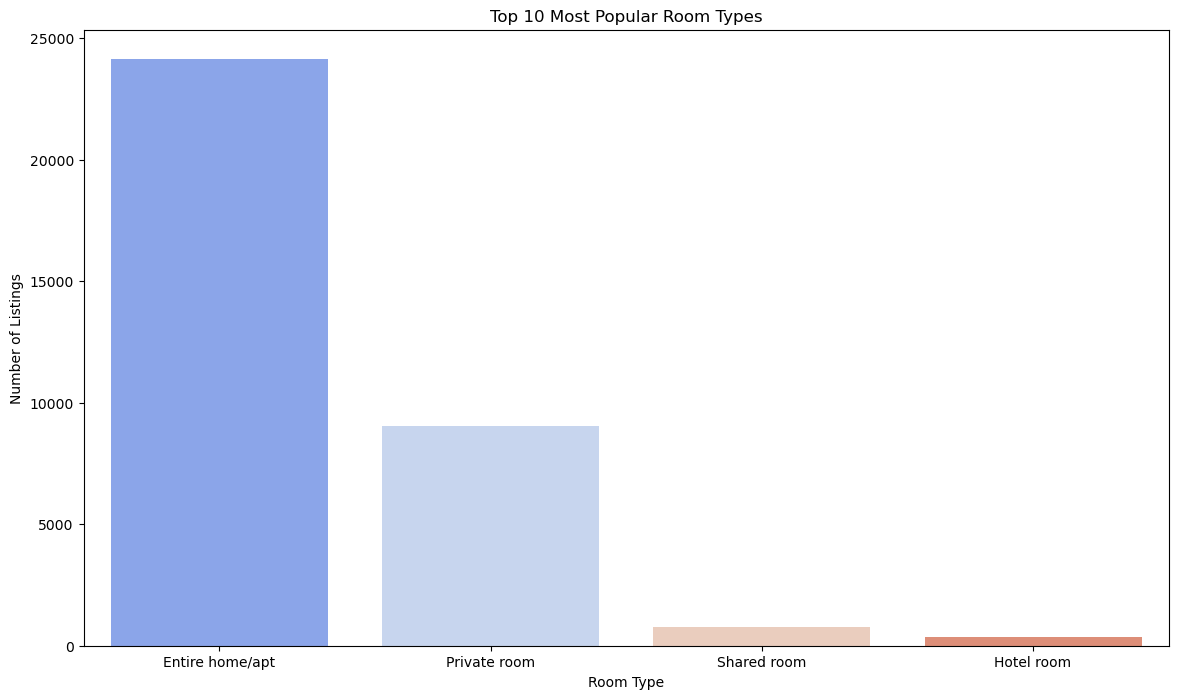

In [22]:
# Group by room type and calculate the number of listings
room_type_stats = df.groupby('room_type').agg(
    number_of_listings=('id', 'count'),
    average_price=('price', 'mean')
).reset_index()

# Sort by number of listings and select the Top 10
top_10_room_types = room_type_stats.sort_values(by='number_of_listings', ascending=False).head(10)

# Visualise the results
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_room_types, x='room_type', y='number_of_listings', palette='coolwarm')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Top 10 Most Popular Room Types')
plt.show()

# Analyse price and availability trends by month for Top 10 room types
df['month'] = pd.to_datetime(df['last_scraped']).dt.month
df['month'] = df['month'].astype(int) # Asegurar que 'month' es un entero
top_room_types_list = top_10_room_types['room_type'].tolist()
top_room_types_data = df[df['room_type'].isin(top_room_types_list)]

room_type_trends = top_room_types_data.groupby(['month', 'room_type']).agg(
    average_price=('price', 'mean'),
    average_availability=('availability_30', 'mean')
).reset_index()


# 6. Deployment

In this section, we communicate the results of our analysis through visualisations and insights.

#### Key Findings:
1. **Most Popular Neighbourhood**: Copacabana has the highest number of listings (8,530), with an average price of R$498.17 and a review score of 93/100.

2. **Most Expensive Neighbourhood**: Ramos tops the list, with an average price of R$3,472.33 per night.

3. **Top-Rated Listings**: 65% of the top-rated listings are entire homes/apartments, with amenities like Wi-Fi, air conditioning, and fully equipped kitchens.

### Acknowledgments

The dataset used in this analysis was sourced from [Inside Airbnb](http://insideairbnb.com/) and is available on [Kaggle](https://www.kaggle.com/datasets/allanbruno/airbnb-rio-de-janeiro/data). Special thanks to Allan Bruno for making this dataset publicly available.